## Climate Change

#### XKCD comic on Climate Change: https://xkcd.com/1732/

#### Exploration on Climate Change: Earth Surface Temperature Data <br>

- **Date:** starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures <br><br>

- **LandAverageTemperature:** global average land temperature in celsius <br><br>

- **LandAverageTemperatureUncertainty:** the 95% confidence interval around the average

In [1]:
# ----linear algebra---- #
import numpy as np

# ----data processing---- #
import pandas as pd

# ----visualization---- #
import seaborn as sns
import matplotlib.pyplot as plt

# ----datetime objects---- #
from datetime import datetime, timedelta

# ----plotly for visualization---- #
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading CSV Files

In [3]:
country_temp = pd.read_csv('/content/drive/MyDrive/Data Misc/GlobalLandTemperaturesByCountry.csv')
state_temp = pd.read_csv('/content/drive/MyDrive/Data Misc/GlobalLandTemperaturesByState.csv')

### Data Preparation

#### Countries

In [4]:
#Original Country Temperatures

country_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [5]:
#Exploring NaN values - Country

country_temp.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [6]:
#Filtered Data Set - Country

filter_country = country_temp['dt'] > "1950-01-01"
country_temp[filter_country]

f_country = country_temp[filter_country]

In [7]:
f_country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
2475,1950-02-01,-1.804,0.305,Åland
2476,1950-03-01,0.090,0.439,Åland
2477,1950-04-01,3.630,0.342,Åland
2478,1950-05-01,8.106,0.239,Åland
2479,1950-06-01,12.783,0.235,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [8]:
#Exploring Filtered NaN values - Country

f_country.isnull().sum()

dt                                 0
AverageTemperature               985
AverageTemperatureUncertainty    246
Country                            0
dtype: int64

In [9]:
#Dropping row NaN values

f_country = f_country.dropna(how='any' ,axis=0)

In [10]:
#Exploring Filtered NaN values - Country

f_country.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [11]:
f_country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
2475,1950-02-01,-1.804,0.305,Åland
2476,1950-03-01,0.090,0.439,Åland
2477,1950-04-01,3.630,0.342,Åland
2478,1950-05-01,8.106,0.239,Åland
2479,1950-06-01,12.783,0.235,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [12]:
f_country.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,184667.0,19.003914,10.499596,-36.332,13.239,23.387,26.564,38.842
AverageTemperatureUncertainty,184667.0,0.355972,0.227586,0.052,0.226,0.300,0.412,5.936


In [13]:
## Preparation for visualization

#Removing the duplicated countries and countries for which no information about the temperature
final_f_country = f_country[~f_country['Country'].isin(['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands','United Kingdom', 'Africa', 'South America'])]
final_f_country = final_f_country.replace(['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Average temperature for each country
countries = np.unique(final_f_country['Country'])
avg_temp_list = []
for country in countries:
    avg_temp_list.append(final_f_country[final_f_country['Country'] == country]['AverageTemperature'].mean())

### State

In [14]:
# Original State Temperatures

state_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [15]:
#Exploring NaN values - Country

state_temp.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [16]:
#Filered Data Set - State

filter_state = state_temp['dt'] > "1950-01-01"
state_temp[filter_state]

f_state = state_temp[filter_state]

In [17]:
#Exploring NaN values - Country

f_state.isnull().sum()

dt                                 0
AverageTemperature               181
AverageTemperatureUncertainty    181
State                              0
Country                            0
dtype: int64

In [18]:
#Filtered Data Set - State

f_state = f_state.dropna(how='any' ,axis=0)

In [19]:
f_state.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

In [20]:
f_state.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,183943.0,10.032437,13.847436,-44.586,0.7165,12.427,21.126,36.339
AverageTemperatureUncertainty,183943.0,0.313159,0.164763,0.036,0.2120,0.277,0.368,5.435


In [21]:
#Renaming columns

f_state.rename(columns={'dt' : 'Date'},inplace=True)
f_state.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,State,Country
1137,1950-02-01,25.973,0.268,Acre,Brazil
1138,1950-03-01,25.759,0.495,Acre,Brazil
1139,1950-04-01,25.810,0.484,Acre,Brazil
1140,1950-05-01,25.610,0.420,Acre,Brazil
1141,1950-06-01,25.160,0.424,Acre,Brazil


In [22]:
#Converting 'Date column' into 'Datetime datatype'

f_state['Date'] = pd.to_datetime(f_state['Date'])
f_state.set_index('Date',inplace = True)
f_state.index

DatetimeIndex(['1950-02-01', '1950-03-01', '1950-04-01', '1950-05-01',
               '1950-06-01', '1950-07-01', '1950-08-01', '1950-09-01',
               '1950-10-01', '1950-11-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=183943, freq=None)

In [23]:
#Converting Date column to index

f_state['year']= f_state.index.year
f_state.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,year
Date,,,,,
1950-02-01,25.973,0.268,Acre,Brazil,1950
1950-03-01,25.759,0.495,Acre,Brazil,1950
1950-04-01,25.810,0.484,Acre,Brazil,1950
1950-05-01,25.610,0.420,Acre,Brazil,1950
1950-06-01,25.160,0.424,Acre,Brazil,1950


### Visualization

#### State

In [24]:
#Data Frame of Average Temperature vs Country

f_state[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')

,AverageTemperature
Country,
Canada,-1.066083
Russia,2.025394
United States,11.254687
China,11.931131
Australia,18.194813
India,22.713134
Brazil,24.298296


In [25]:
#Data Frame of Average Temperature vs Date

final_f_state = f_state[['AverageTemperature']].resample('A').mean()
final_f_state.head()

,AverageTemperature
Date,
1950-12-31,10.592581
1951-12-31,9.666095
1952-12-31,9.694725
1953-12-31,10.000690
1954-12-31,9.687827


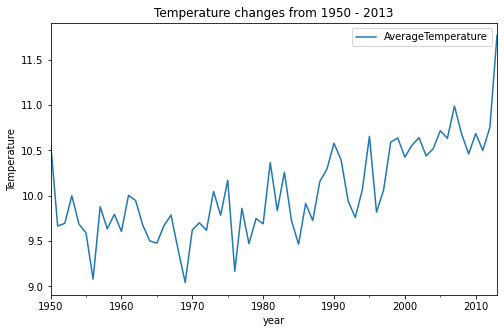

In [26]:
final_f_state.plot(title='Temperature changes from 1950 - 2013',figsize=(8,5))
plt.ylabel('Temperature')
plt.xlabel('year')
plt.show()

**But correlation is NOT causation...** <br><br>

As you can see the temperatures have been gradually increasing throughout 1950 to 2010. <br>
And after 2010, it exponentially increased! <br>
This might be because of temperatures increasing rapidly closer to 2013 or because more data points were observed. <br>
...more analysis would be necessary for this claim

### Global

In [28]:
#Help - Kaggle: Analysis of Global Warming

#Viewing average temperatures per country

data = [dict(type = 'choropleth',locations = countries,z = avg_temp_list,locationmode = 'country names',
              text = countries,marker = dict(line = dict(color = 'rgb(0,0,0)', width = 1)),
              colorbar = dict(autotick = True, tickprefix = '', title = '# Mean\nTemperature,\n°C'))]
layout = dict(title = 'Avgerage land temperature in countries',
              geo = dict(showframe = False,showocean = True,oceancolor = 'rgb(0,255,255)',
                         projection = dict(type = 'orthographic',rotation = dict(lon = 60,lat = 10),),
                         lonaxis =  dict(showgrid = True,gridcolor = 'rgb(102, 102, 102)'),
                         lataxis = dict(showgrid = True,gridcolor = 'rgb(102, 102, 102)')),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



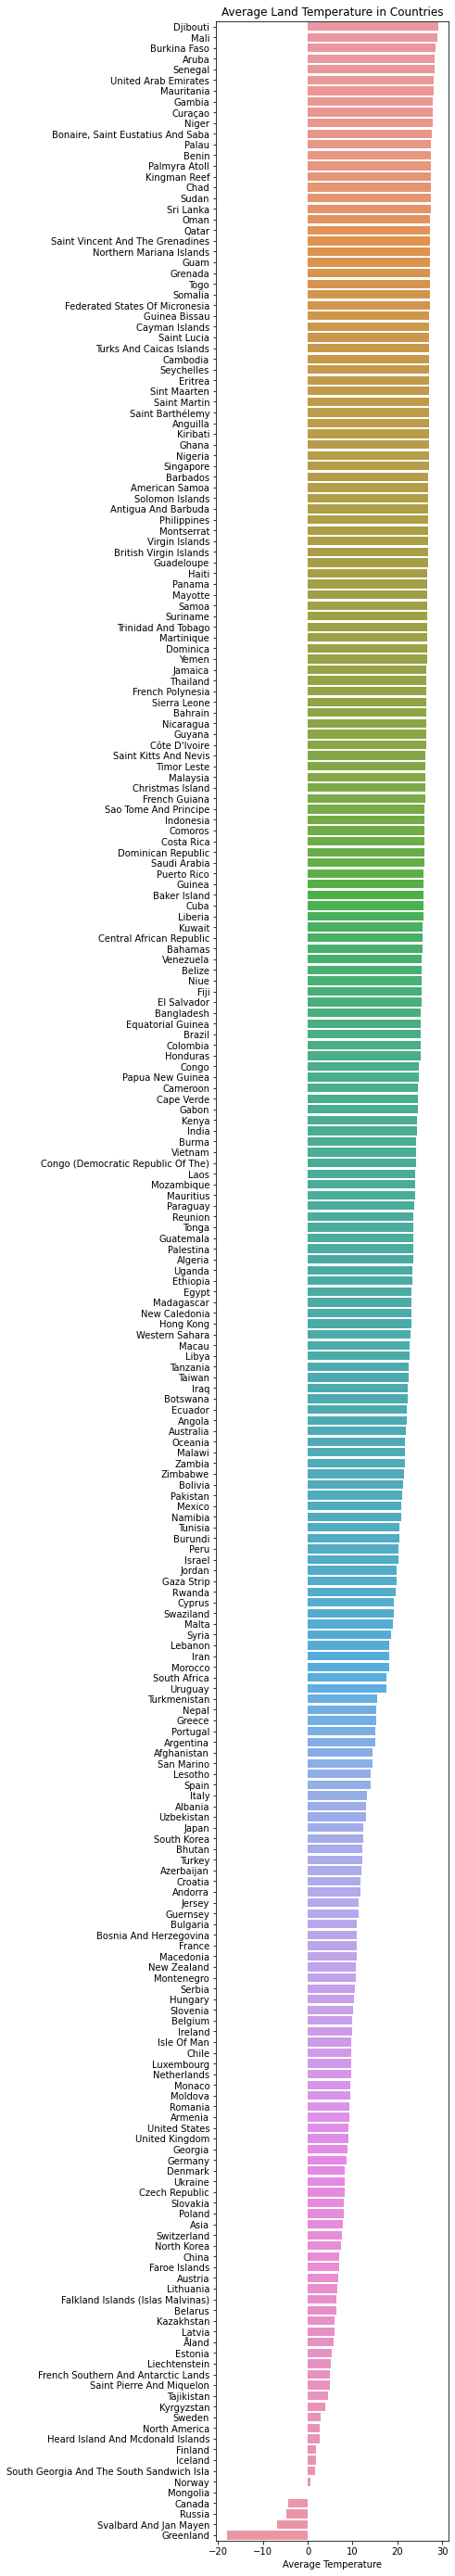

In [29]:
##Visualizing Temperature Differences of Countries

avg_temp, countries_temp = (list(x) for x in zip(*sorted(zip(avg_temp_list, countries), reverse = True))) 
plt.subplots(figsize=(4.5, 50))
sns.color_palette('coolwarm', len(countries))
sns.barplot(avg_temp, countries_temp)

plt.xlabel("Average Temperature")
plt.title("Average Land Temperature in Countries");

- Here we can see that **Djibouti** had the biggest impact on Climate Change (by increasing almost by 30 degrees Celsius) <br><br>
- **Quatar** also had a massive impact on Climate Change, because of the industrial areas and oil production.<br><br>
- **Norway** had almost no change in the period of 1950 - 2013. <br><br>
- **Greenland** had around -18 degrees Celsius change, thus Greenland's temperature decreased in that period.